In [1]:
import pandas as pd

# Load the dataset
dataset_path = '/content/titanic.csv'
data = pd.read_csv(dataset_path)

# Print the first few rows to verify the dataset has been loaded correctly
print(data.head())

   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  


Visualization

In [2]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   survived     891 non-null    int64  
 1   pclass       891 non-null    int64  
 2   sex          891 non-null    object 
 3   age          714 non-null    float64
 4   sibsp        891 non-null    int64  
 5   parch        891 non-null    int64  
 6   fare         891 non-null    float64
 7   embarked     889 non-null    object 
 8   class        891 non-null    object 
 9   who          891 non-null    object 
 10  adult_male   891 non-null    bool   
 11  deck         203 non-null    object 
 12  embark_town  889 non-null    object 
 13  alive        891 non-null    object 
 14  alone        891 non-null    bool   
dtypes: bool(2), float64(2), int64(4), object(7)
memory usage: 92.4+ KB


●	Univariate Analysis

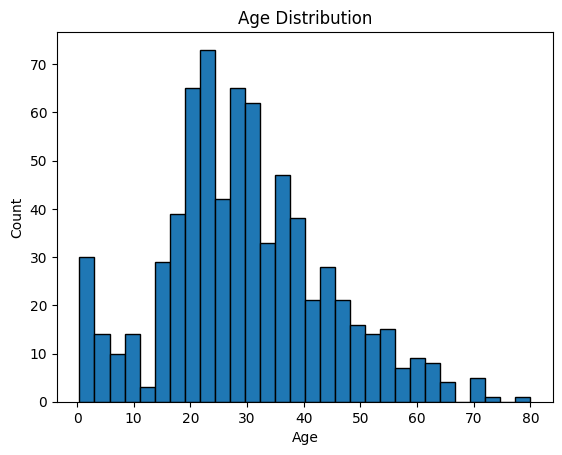

In [3]:
import matplotlib.pyplot as plt

# Histogram for age distribution
plt.hist(data['age'].dropna(), bins=30, edgecolor='k')
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Age Distribution')
plt.show()

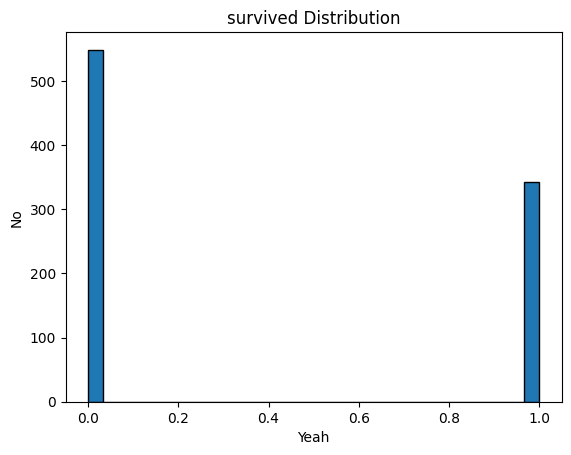

In [4]:
import matplotlib.pyplot as plt

# Histogram for age distribution
plt.hist(data['survived'].dropna(), bins=30, edgecolor='k')
plt.xlabel('Yeah')
plt.ylabel('No')
plt.title('survived Distribution')
plt.show()

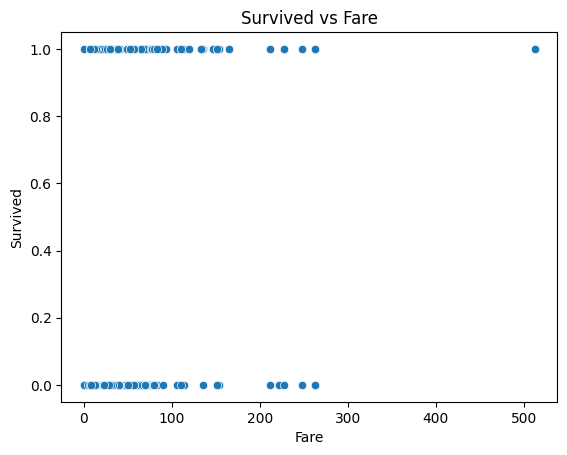

In [5]:
import seaborn as sns

# Scatter plot for Survived vs Fare
sns.scatterplot(data=data, x='fare', y='survived')
plt.xlabel('Fare')
plt.ylabel('Survived')
plt.title('Survived vs Fare')
plt.show()

<ipython-input-6-4a88ba0b1f3c>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = data.corr()


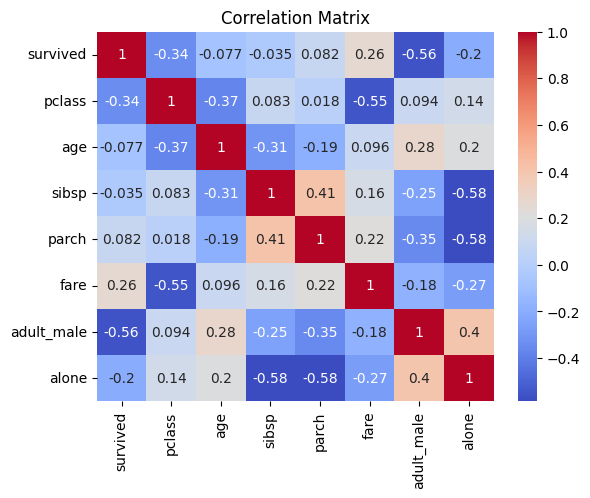

In [6]:
# Correlation matrix
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

In [7]:
print(data.describe())

         survived      pclass         age       sibsp       parch        fare
count  891.000000  891.000000  714.000000  891.000000  891.000000  891.000000
mean     0.383838    2.308642   29.699118    0.523008    0.381594   32.204208
std      0.486592    0.836071   14.526497    1.102743    0.806057   49.693429
min      0.000000    1.000000    0.420000    0.000000    0.000000    0.000000
25%      0.000000    2.000000   20.125000    0.000000    0.000000    7.910400
50%      0.000000    3.000000   28.000000    0.000000    0.000000   14.454200
75%      1.000000    3.000000   38.000000    1.000000    0.000000   31.000000
max      1.000000    3.000000   80.000000    8.000000    6.000000  512.329200


In [9]:
# Fill missing values in Age column with median
data['age'].fillna(data['age'].median(), inplace=True)

In [10]:
# Fill missing values in sibsp column with median
data['sibsp'].fillna(data['sibsp'].median(), inplace=True)

In [11]:
# Fill missing values in Age column with median
data['fare'].fillna(data['fare'].median(), inplace=True)

7. 


In [12]:
# Replace outliers in Fare column with median
Q1 = data['fare'].quantile(0.25)
Q3 = data['fare'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['fare'] = data['fare'].apply(lambda x: data['fare'].median() if x < lower_bound or x > upper_bound else x)


In [13]:
import pandas as pd

# Load the dataset
dataset_path = '/content/titanic.csv'  # Update with the actual path to the dataset
data = pd.read_csv(dataset_path)

# Find outliers using IQR method for numeric columns
numeric_columns = ['age', 'fare']  # Update with the actual numeric columns in your dataset

for column in numeric_columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    
    print(f"Outliers in {column}:")
    print(outliers)


Outliers in age:
     survived  pclass   sex   age  sibsp  parch     fare embarked   class  \
33          0       2  male  66.0      0      0  10.5000        S  Second   
54          0       1  male  65.0      0      1  61.9792        C   First   
96          0       1  male  71.0      0      0  34.6542        C   First   
116         0       3  male  70.5      0      0   7.7500        Q   Third   
280         0       3  male  65.0      0      0   7.7500        Q   Third   
456         0       1  male  65.0      0      0  26.5500        S   First   
493         0       1  male  71.0      0      0  49.5042        C   First   
630         1       1  male  80.0      0      0  30.0000        S   First   
672         0       2  male  70.0      0      0  10.5000        S  Second   
745         0       1  male  70.0      1      1  71.0000        S   First   
851         0       3  male  74.0      0      0   7.7750        S   Third   

     who  adult_male deck  embark_town alive  alone  
33  

In [14]:
# Replace outliers in age column with median
Q1 = data['age'].quantile(0.25)
Q3 = data['age'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

data['age'] = data['age'].apply(lambda x: data['age'].median() if x < lower_bound or x > upper_bound else x)


Check for Categorical columns and perform encoding:

In [15]:
# One-hot encoding for Survived column
data = pd.get_dummies(data, columns=['survived'], drop_first=True)


In [17]:
import pandas as pd

# Define the mapping dictionary
sex_mapping = {'male': 0, 'female': 1}

# Apply max-min encoding to the 'Sex' column
data['Sex_encoded'] = data['sex'].map(sex_mapping)

# Print the updated 'Sex_encoded' column
print(data['Sex_encoded'])


0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    1
889    0
890    0
Name: Sex_encoded, Length: 891, dtype: int64


In [19]:
from sklearn.preprocessing import LabelEncoder

# Create an instance of LabelEncoder
label_encoder = LabelEncoder()

# Perform label encoding on the 'alone' column
data['alone_encoded'] = label_encoder.fit_transform(data['alone'])
print(data['alone_encoded'])

0      0
1      0
2      1
3      0
4      1
      ..
886    1
887    1
888    0
889    1
890    1
Name: alone_encoded, Length: 891, dtype: int64


In [22]:
data.describe()

,pclass,age,sibsp,parch,fare,survived_1,Sex_encoded,alone_encoded
count,891.000000,714.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,2.308642,29.055560,0.523008,0.381594,32.204208,0.383838,0.352413,0.602694
std,0.836071,13.622807,1.102743,0.806057,49.693429,0.486592,0.477990,0.489615
min,1.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,20.125000,0.000000,0.000000,7.910400,0.000000,0.000000,0.000000
50%,3.000000,28.000000,0.000000,0.000000,14.454200,0.000000,0.000000,1.000000
75%,3.000000,37.000000,1.000000,0.000000,31.000000,1.000000,1.000000,1.000000
max,3.000000,64.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


In [36]:
data['sex'] = data['sex'].map({'male': 1, 'female': 0})

In [37]:
# Split into dependent and independent variables
y = data['survived_1']
X = data.drop('survived_1', axis=1)

In [ ]:
from sklearn.preprocessing import StandardScaler

# Standardize the independent variables
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [42]:
from sklearn.model_selection import train_test_split

# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
